In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
from tensorflow.keras.utils import image_dataset_from_directory

In [8]:
training_set = image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 76515 files belonging to 4 classes.


In [9]:
validation_set = image_dataset_from_directory(
    'val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 21861 files belonging to 4 classes.


In [10]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [11]:
INPUT_SHAPE = (224, 224, 3)


In [12]:
mobnet = tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
    # name="MobileNetV3Large",
)

In [13]:
model = tf.keras.models.Sequential()


In [14]:
model.add(tf.keras.Input(shape=INPUT_SHAPE))


In [15]:
model.add(mobnet)

In [16]:
model.add(tf.keras.layers.Dense(units = 4,activation='softmax'))


In [17]:
metrics_list = ['accuracy',
                tf.keras.metrics.F1Score()]

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=metrics_list)

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,511,436 (21.02 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [22]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=15)


Epoch 1/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 9188s 4s/step - accuracy: 0.8905 - f1_score: 0.6849 - loss: 1.1576 - val_accuracy: 0.8977 - val_f1_score: 0.6940 - val_loss: 0.9313
Epoch 2/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 8511s 4s/step - accuracy: 0.8998 - f1_score: 0.6969 - loss: 0.8658 - val_accuracy: 0.9019 - val_f1_score: 0.6998 - val_loss: 0.6970
Epoch 3/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 8919s 4s/step - accuracy: 0.9000 - f1_score: 0.7026 - loss: 0.6515 - val_accuracy: 0.9502 - val_f1_score: 0.9055 - val_loss: 0.5471
Epoch 4/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 9012s 4s/step - accuracy: 0.9556 - f1_score: 0.9214 - loss: 0.5053 - val_accuracy: 0.9489 - val_f1_score: 0.9132 - val_loss: 0.4354
Epoch 5/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 8718s 4s/step - accuracy: 0.9611 - f1_score: 0.9318 - loss: 0.3945 - val_accuracy: 0.9661 - val_f1_score: 0.9411 - val_loss: 0.3280
Epoch 6/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 8533s 4s/step - accuracy: 0.9662 - f1_score: 0.9413 - loss: 0.3088 - val_accuracy: 0.967

In [42]:
model.save("Trained_Eye_disease_model.h5")

In [43]:
model.save("Trained_Eye_disease_model.keras")

In [25]:
training_history

In [26]:
training_history.history

{'accuracy': [0.8927268981933594,
  0.8979938626289368,
  0.9080572724342346,
  0.9572371244430542,
  0.9625694155693054,
  0.9673135876655579,
  0.9720577597618103,
  0.9768149852752686,
  0.979089081287384,
  0.9823694825172424,
  0.984957218170166,
  0.9869437217712402,
  0.9885904788970947,
  0.98946613073349,
  0.9899758100509644],
 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.8980557 , 0.88868034, 0.        , 0.96460724], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.8925277, 0.912557 , 0.       , 0.9755522], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.899517  , 0.92472714, 0.21820217, 0.97903824], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.96118647, 0.9350327 , 0.81994945, 0.98267585], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.966411  , 0.9475632 , 0.84023374, 0.9843293 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array(

In [27]:
# Saving history
with open('Training_history.pkl', 'wb') as f:
    pickle.dump(training_history.history, f)

In [28]:
#Reloading History from pickle
with open('Training_history.pkl', 'rb') as f:
    load_history = pickle.load(f)
print(load_history)

{'accuracy': [0.8927268981933594, 0.8979938626289368, 0.9080572724342346, 0.9572371244430542, 0.9625694155693054, 0.9673135876655579, 0.9720577597618103, 0.9768149852752686, 0.979089081287384, 0.9823694825172424, 0.984957218170166, 0.9869437217712402, 0.9885904788970947, 0.98946613073349, 0.9899758100509644], 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.8980557 , 0.88868034, 0.        , 0.96460724], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.8925277, 0.912557 , 0.       , 0.9755522], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.899517  , 0.92472714, 0.21820217, 0.97903824], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.96118647, 0.9350327 , 0.81994945, 0.98267585], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.966411  , 0.9475632 , 0.84023374, 0.9843293 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9715424 , 0.95441025, 0.86098087, 0.

In [29]:
load_history.keys()

dict_keys(['accuracy', 'f1_score', 'loss', 'val_accuracy', 'val_f1_score', 'val_loss'])

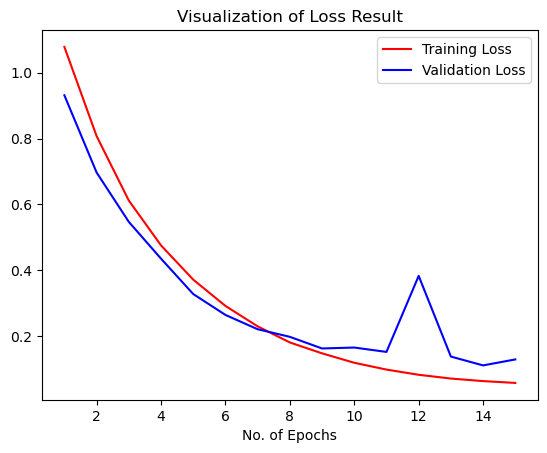

In [30]:
#Loss Visualization
epochs = [i for i in range(1,16)]
plt.plot(epochs,load_history['loss'],color='red',label='Training Loss')
plt.plot(epochs,load_history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

Model Evaluation

In [72]:
model = tf.keras.models.load_model("Trained_Eye_disease_model.keras")


In [74]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,998,474 (41.96 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

 Optimizer params: 5,487,038 (20.93 MB)

In [75]:
test_set = validation_set = image_dataset_from_directory(
    './test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10933 files belonging to 4 classes.


In [76]:
test_loss,test_acc,f1_score = model.evaluate(test_set)


342/342 ━━━━━━━━━━━━━━━━━━━━ 368s 1s/step - accuracy: 0.9664 - f1_score: 0.6347 - loss: 0.1387


In [77]:
test_loss,test_acc,f1_score

(0.132725790143013,
 0.9703649282455444,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9763885 , 0.94783765, 0.8897593 , 0.9847813 ], dtype=float32)>)

In [50]:
##Computing True labels from test set
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [78]:
true_categories

<tf.Tensor: shape=(10933, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)>

In [79]:
Y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [80]:
##Computing Predicted labels using test set
predicted_categories = model.predict(test_set)
predicted_categories

342/342 ━━━━━━━━━━━━━━━━━━━━ 402s 1s/step


array([[0.9849895 , 0.00411389, 0.00687141, 0.00402515],
       [0.9849895 , 0.00411389, 0.00687141, 0.00402515],
       [0.9849895 , 0.00411389, 0.00687141, 0.00402515],
       ...,
       [0.00271814, 0.00354443, 0.00499113, 0.98874635],
       [0.00271814, 0.00354443, 0.00499113, 0.98874635],
       [0.00271814, 0.00354443, 0.00499113, 0.98874635]], dtype=float32)

In [81]:
Y_pred = tf.argmax(predicted_categories, axis=1)
Y_pred

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

1. Classification Report

In [82]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3746
           1       0.98      0.92      0.95      1161
           2       0.88      0.90      0.89       887
           3       0.98      0.99      0.98      5139

    accuracy                           0.97     10933
   macro avg       0.96      0.94      0.95     10933
weighted avg       0.97      0.97      0.97     10933



2. Confusion Matrix

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true,Y_pred)
cm

array([[3639,   14,   82,   11],
       [  23, 1063,    5,   70],
       [  40,    2,  795,   50],
       [   6,    3,   18, 5112]], dtype=int64)

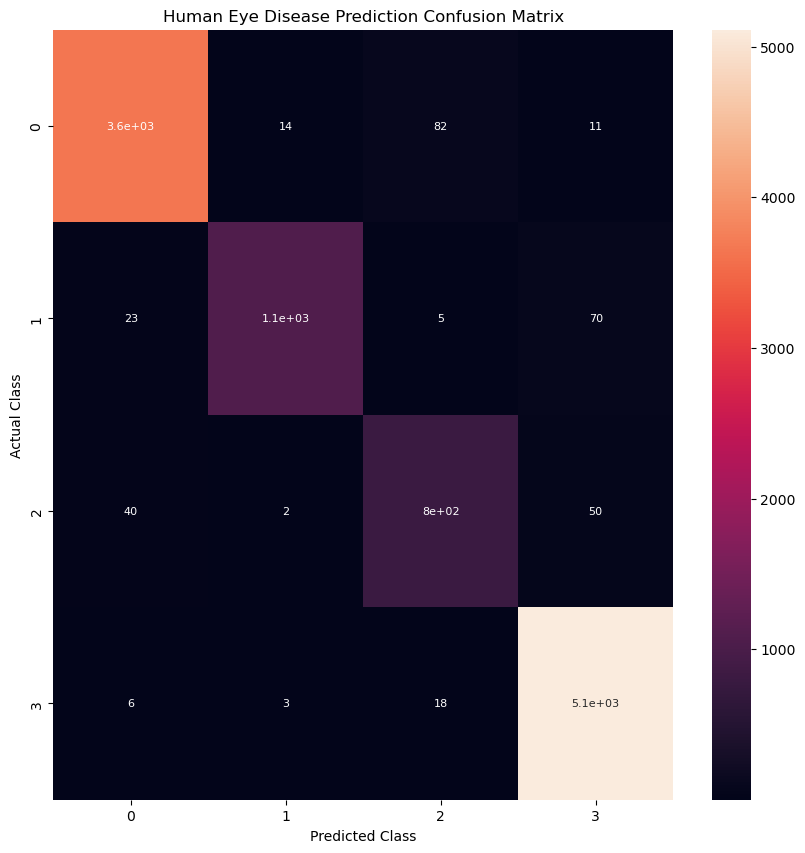

In [84]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={"size":8})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Human Eye Disease Prediction Confusion Matrix",fontsize=12)
plt.show()